In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel("/content/gdrive/MyDrive/train.xlsx")

# Yeni Bölüm

In [11]:
df=df

In [12]:
df.head

<bound method NDFrame.head of             A1      A2      A3      A4    A5 A6    A7      A8  A9  A10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        A113  A114   

In [13]:
df.shape

(246008, 122)

In [14]:
df.info

<bound method DataFrame.info of             A1      A2      A3      A4    A5 A6    A7      A8  A9  A10  ...  \
0        69769    -946  0.1613  0.7960  Panl  N  Bus2  0.0742   0    2  ...   
1       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
2       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
3        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
4        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246003  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246004  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246005  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246006  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246007    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        A113  A114 

# Yeni Bölüm

In [15]:
df.dtypes

A1        int64
A2        int64
A3      float64
A4      float64
A5       object
         ...   
A118     object
A119    float64
A120    float64
A121      int64
A122      int64
Length: 122, dtype: object

In [16]:
df.isnull().sum()
#hangi kolonda kaç tane null değer var buna baktık

A1           0
A2           0
A3      143829
A4      163543
A5      124975
         ...  
A118         0
A119       811
A120    122297
A121         0
A122         0
Length: 122, dtype: int64

In [19]:
NaColumn = df.columns[df.isnull().mean()>=0.40]
df1= df.drop(NaColumn, axis=1)
#Eğer bir kolondaki değerlerin %40'tan fazlası null ise o kolonları datasetten çıkardık

In [20]:
df1.isnull().sum()
#bu işlemden sonra kolon sayımız 73'e düştü

A1        0
A2        0
A6        0
A7        0
A9        0
       ... 
A117      0
A118      0
A119    811
A121      0
A122      0
Length: 73, dtype: int64

In [30]:
column_cat = df1.select_dtypes(include='object').columns
print(column_cat)
#object kategorisi olan kolonları column_cat'a atadım

Index([], dtype='object')


In [48]:
df1 = pd.get_dummies(df1, columns=column_cat)
df1.head
df1.isnull().sum()
NaColumn1 = df1.columns[df1.isnull().mean()>=0.10]
df1.isnull().sum()
df1= df1.drop(NaColumn1, axis=1)
df1.head

#pandas kütüphanesinde bulunan get_dummies fonksiyonu yardımıyla kategorik olan örnek veriyorum; bir kolonda pazartesi salı çarşamba diye
#değerler var bu kolondaki değerleri alıp üç yeni kolon yaratıyor pazartesi, salı ve çarşamba adı altında ve eğer o müşteri, yolcu her neyse
#eğer pazartesi gittiyse veya yolcuysa onun karşılık gelen hücrede 1 değilse sıfır yazıyor yani binary hale geliyor. aynısını salı ve çarşamba 
#günleri için yeni kolon yaratıp yapıyor
#bu işlemden sonra kolon sayımız 178 oldu 

<bound method NDFrame.head of             A1      A2  A9  A10       A14  A16  A20  A21  A24  A25  ...  \
0        69769    -946   0    2  180000.0    0    0    0    0    0  ...   
1       236977     -92   0    3  135000.0    0    0    0    0    0  ...   
2       168821   -1646   0    2  553500.0    0    0    1    0    0  ...   
3        94708   -1651   0    2  391500.0    0    0    1    0    0  ...   
4        84556    -977   0    2  225000.0    0    0    0    0    0  ...   
...        ...     ...  ..  ...       ...  ...  ...  ...  ...  ...  ...   
246003  248161    -595   0    2  405000.0    0    0    0    0    1  ...   
246004  257069   -4334   0    2  225000.0    0    0    0    0    0  ...   
246005  154350  365243   0    2  234000.0    0    0    0    0    0  ...   
246006  148183  365243   0    3  810000.0    0    0    1    0    0  ...   
246007    5167  365243   0    2  877500.0    0    0    1    0    0  ...   

        A94_TUEY  A94_WEDY  A104_Cass  A104_Revs  A118_Cive  A118_Mar

In [54]:
df1.dtypes
df1.isnull().sum()


A1             0
A2             0
A9             0
A10            0
A14          221
            ... 
A118_Mard      0
A118_Sepd      0
A118_Sind      0
A118_Unkn      0
A118_Widw      0
Length: 171, dtype: int64

In [55]:
df1.dtypes

A1             int64
A2             int64
A9             int64
A10            int64
A14          float64
              ...   
A118_Mard      uint8
A118_Sepd      uint8
A118_Sind      uint8
A118_Unkn      uint8
A118_Widw      uint8
Length: 171, dtype: object

In [57]:
median_A14 = df1['A14'].median()
median_A14

450000.0

In [61]:
 df1['A14'] =  df1['A14'].fillna(median_A14)
df1.isnull().sum()

A1           0
A2           0
A9           0
A10          0
A14          0
            ..
A118_Mard    0
A118_Sepd    0
A118_Sind    0
A118_Unkn    0
A118_Widw    0
Length: 171, dtype: int64

In [65]:
num_missing = df1.isnull().sum()

# count the number of columns with missing values
num_cols_with_missing = (num_missing > 0).sum()

print("Number of columns with missing values:", num_cols_with_missing)



Number of columns with missing values: 0


In [64]:
for column in df1.select_dtypes(include=['float64', 'int64']).columns:
    median = df1[column].median()
    df1[column].fillna(median, inplace=True)

#datasette NA değer kalınca korelasyon hesaplanamadığı için eğer datasette float ve integer tipinde NA data varsa bunlarda boşlukları
# o kolonun medyanı ile doldurdum ve NA değer kalmadı


In [66]:
corr_matrix=df1.corr()

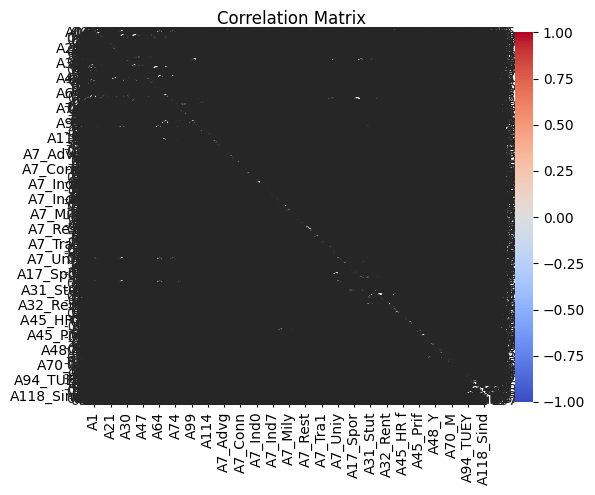

In [67]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()
### Çok sütun olduğu için doğal olarak düzhün bir map çıkmadı

In [69]:
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
columns_to_drop = [col for col in high_corr.columns if any(high_corr[col] > 0.9)]
df1 = df1.drop(columns=columns_to_drop)

#korelasyonu 0.9'dan fazla olan kolonlardan birini datasetten çıkardım

In [70]:
df1.shape
### son olarak 246008 satır 166 sütunlu bir dataset oldu

(246008, 166)